# Implimenting multiple regression algorythms to predict Health Care Cost

### Libraries and data import

#### Import Libraries

In [1]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

#### Data import and basic exploration

In [2]:
data=pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##### Data Description

<b>Age:</b> insurance contractor age, years <br>

<b>Sex:</b> insurance contractor gender, [female, male] <br>

<b>BMI:</b> Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9 <br>

<b>Children:</b> number of children covered by health insurance / Number of dependents. <br>

<b>Smoker:</b> smoking, [yes, no] <br>

<b>Region:</b> the beneficiary’s residential area in the US, [northeast, southeast, southwest, northwest]<br>

<b>Charges:</b> Individual medical costs billed by health insurance, $ #predicted value <br>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Splitting into input and output features

In [3]:
x=data.drop(["charges"], axis=1)
y=data["charges"]

In [4]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [7]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

#### Seperating numerical features and categorical features

In [8]:
column_int=[]
column_obj=[]
for col in x:
    dataTypeObj = x.dtypes[col]
    if dataTypeObj == np.int64 or dataTypeObj == np.float64 :
        column_int.append(col)
    if dataTypeObj== np.object:
        column_obj.append(col)

In [9]:
column_int

['age', 'bmi', 'children']

In [10]:
column_obj

['sex', 'smoker', 'region']

### Exploratory Data Analysis

Since we have lower number of input features so we can visualize relation between all numerical features with output feature.

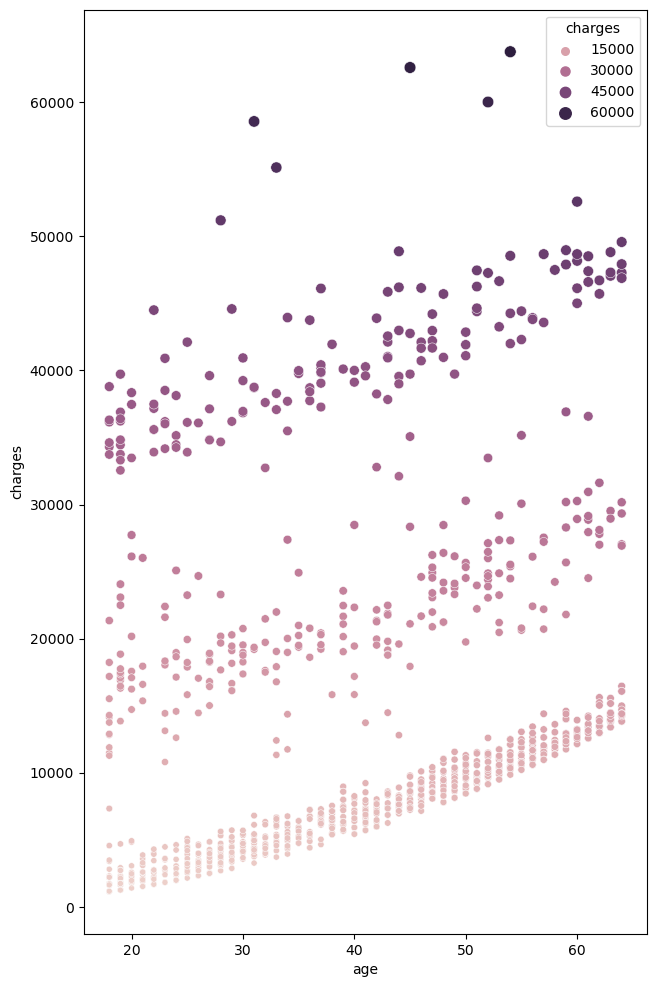

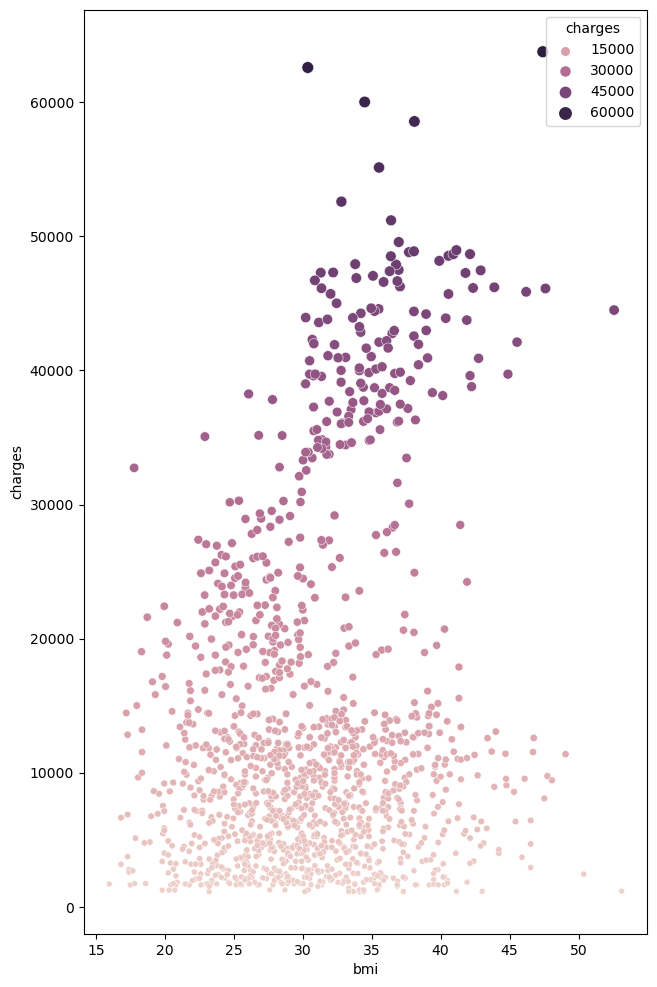

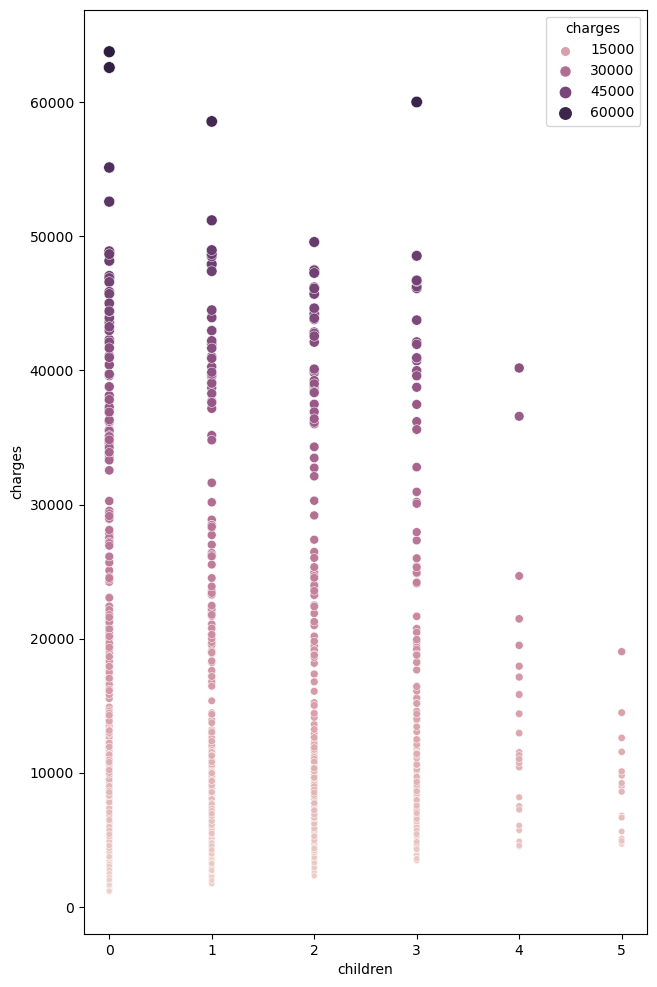

In [11]:
for i in column_int:
    plt.figure(figsize = (16, 12))
    #ax = plt.subplot(1,2,1)
    #sns.relplot(x=data["medianHouseValue"], y=data[i], data=data, ax= ax);
    ax = plt.subplot(1,2,2)
    sns.scatterplot(y=data["charges"], x=data[i], data=data, ax= ax, size="charges",hue="charges");

From the aboce scatter plot, by observing it, we can conclude that,<br>
1. In age range from 18 years to 64 years, we cans ee the cluster of similar kind of charges i.e. 1100-15000, 12000-30000, 33000-50000. Apart from this, we also have some discrete higher charges upto 63770. <br>
2. People having BMI from 15 to 35, mostly pay the charges 25000. Apart from this, some people having BMI from 30 to 55 pays higher charges from 30000 to 63770. <br>
3. The number of total people with no children is very very high and they pay charges from low to high. Along with that, The number of total people with more children is getting reduced gradually and they pay less charges.

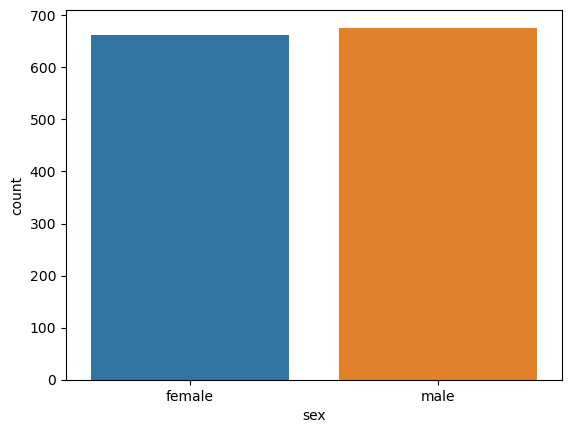

In [12]:
sns.countplot(x='sex', data=data);

Number of male is slightly high than female.

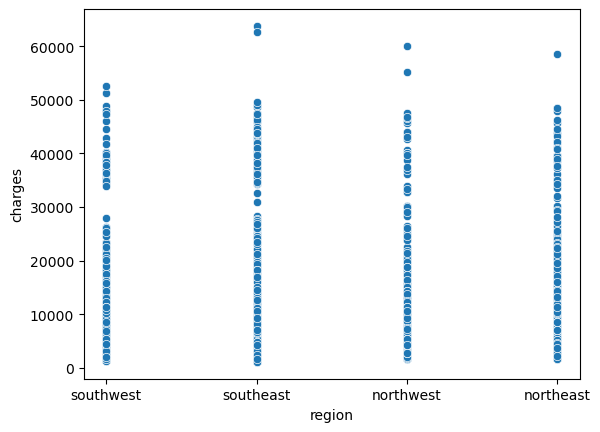

In [13]:
sns.scatterplot(x='region', y='charges', data=data);

People of all region pays the same to some extend. Few people from south east region pays the most.

<AxesSubplot:xlabel='sex', ylabel='charges'>

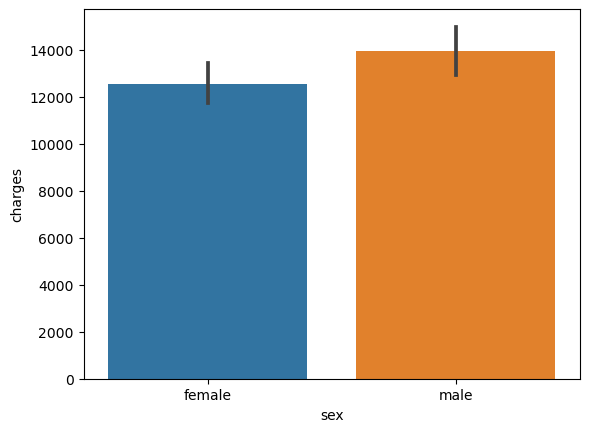

In [14]:
sns.barplot(x="sex", y="charges", data=data)

Females pay slightly lower charges than male

<AxesSubplot:xlabel='children', ylabel='charges'>

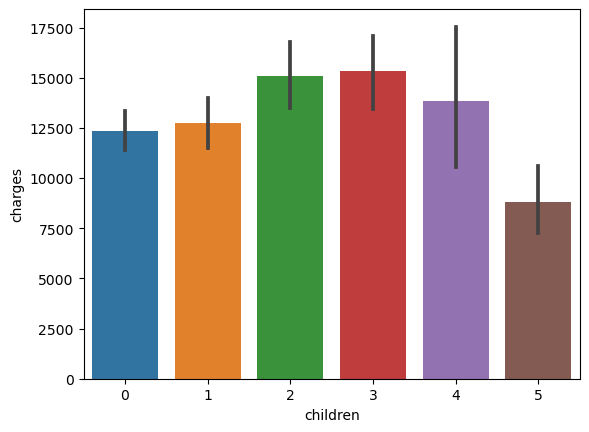

In [15]:
sns.barplot(x="children", y="charges", data=data)

People having 2-3 children pay the most charges and people having 5 children pay the least charges.

### Feature Engineering

In [16]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [17]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

##### Checking for null values

In [18]:
x.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [19]:
y.isnull().sum()

0

So we do not have any null values in the dataset.

##### Checking for outliers

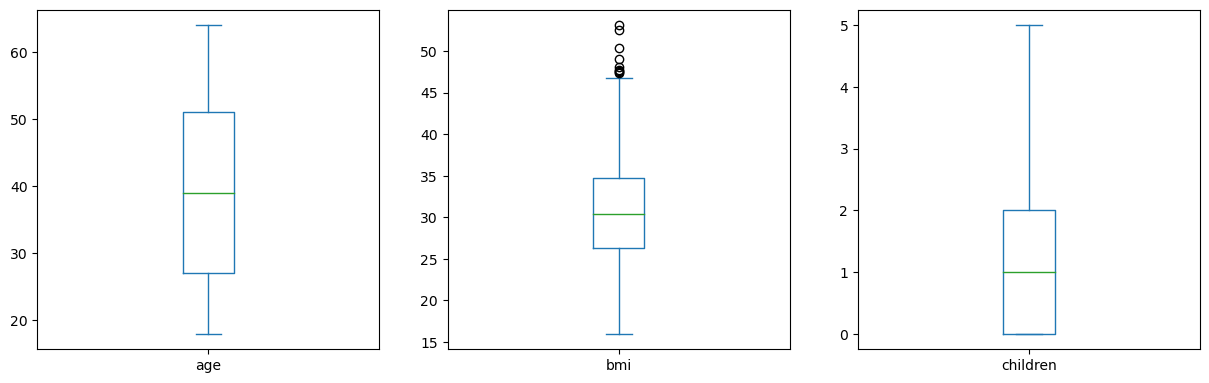

In [20]:
x.plot(kind="box", subplots=True, layout=(3,3), figsize=(15,15));

So we have some outliers in <b>BMI</b> feature, but it is a natural data so it is a real data so we do not have to remove it.

##### Checking ditribution of output feature

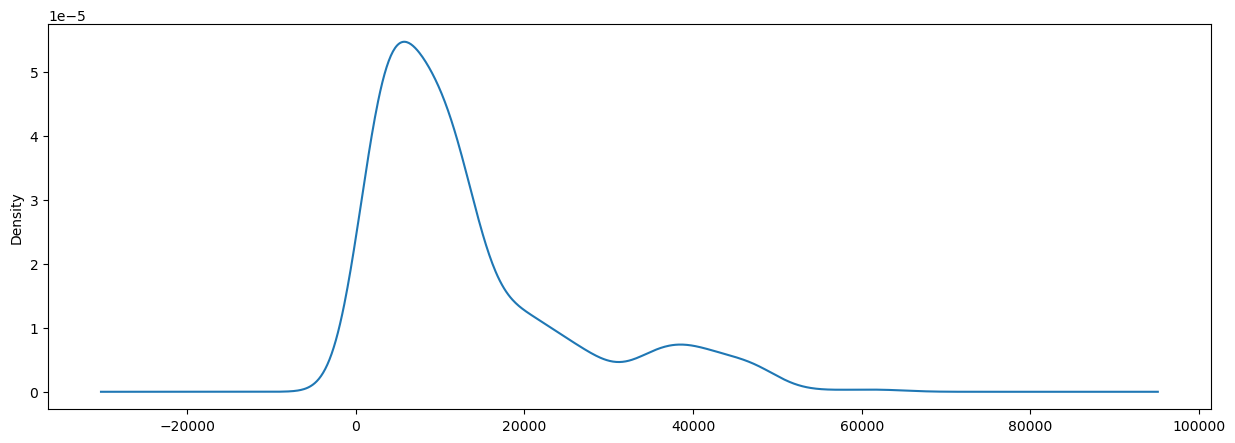

In [21]:
y.plot(kind='kde', figsize=(15,5));

Output feature is right skewed, so we have to aply log transformation to make it normally distributed.

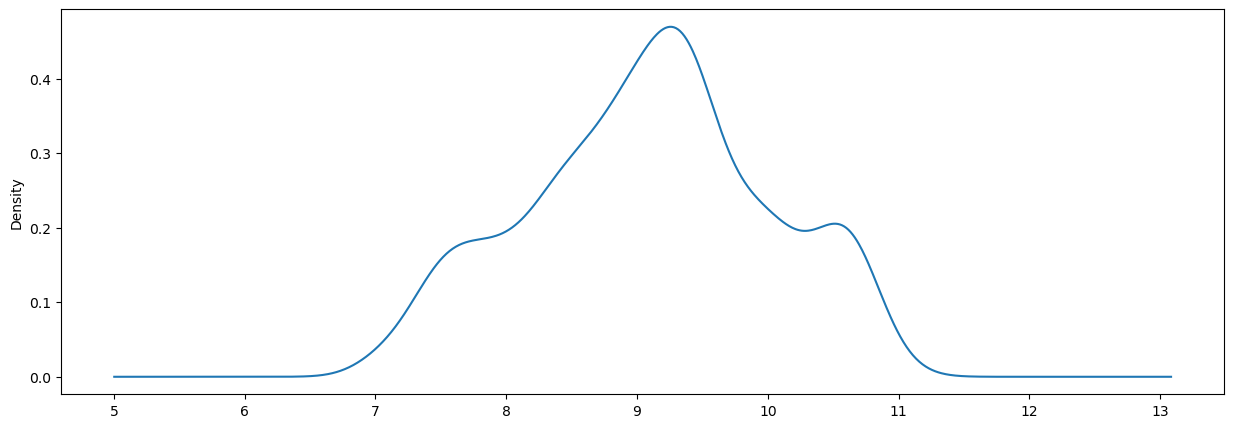

In [22]:
y=np.log(y)
y.plot(kind='kde', figsize=(15,5));

##### Converting Categorical features into numerical features

Exploring categorical features with their <b>category</b> and <b>count of each category</b>

In [23]:
for i in column_obj:
    print("_"*50)
    print("Column name:", i)
    display(x[i].value_counts())
    print("_"*50)

__________________________________________________
Column name: sex


male      676
female    662
Name: sex, dtype: int64

__________________________________________________
__________________________________________________
Column name: smoker


no     1064
yes     274
Name: smoker, dtype: int64

__________________________________________________
__________________________________________________
Column name: region


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

__________________________________________________


In [24]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
x["sex"]=encoder.fit_transform(x["sex"])
x["smoker"]=encoder.fit_transform(x["smoker"])
x["region"]=encoder.fit_transform(x["region"])
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [25]:
x.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

### Feature Selection

##### Checking for feature importance

[0.36913965 0.01231534 0.09428976 0.04789955 0.44482927 0.03152643]
Plotting graph of feature importances for better visualization


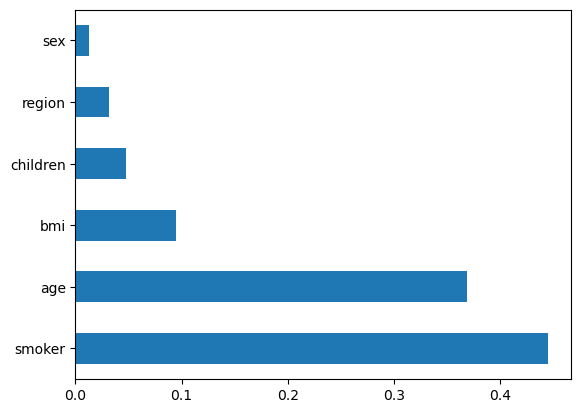

______________________________________________________________________
Getting importance of all features in descending order as a dataframe
______________________________________________________________________


,Features,Importance
4,smoker,0.444829
0,age,0.369140
2,bmi,0.094290
3,children,0.047900
5,region,0.031526
1,sex,0.012315


In [26]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x, y)


print(model.feature_importances_)



#plot graph of feature importances for better visualization
print("Plotting graph of feature importances for better visualization")
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(x.shape[1]).plot(kind='barh')
plt.show()

print("_"*70)
#Getting importance of all features in descending order as a dataframe
print("Getting importance of all features in descending order as a dataframe")
print("_"*70)
feat_importances.sort_values(ascending=False)
feature_df=feat_importances.to_frame()
DF=feat_importances.reset_index().rename(columns={"index":"Features", 0:"Importance"})
DF=DF.sort_values(by=['Importance'], ascending=False)
display(DF)

From the above diagram, we can see <b>smoker</b>, <b>age</b>,<b>bmi</b> and <b>children</b> features are the most important feature but <b>sex</b> is the least important feature so we can drop it anyways.

In [27]:
x.drop(["sex"], inplace=True, axis=1)
x.head()

,age,bmi,children,smoker,region
0,19,27.900,0,1,3
1,18,33.770,1,0,2
2,28,33.000,3,0,2
3,33,22.705,0,0,1
4,32,28.880,0,0,1


##### Correlation and Heatmap

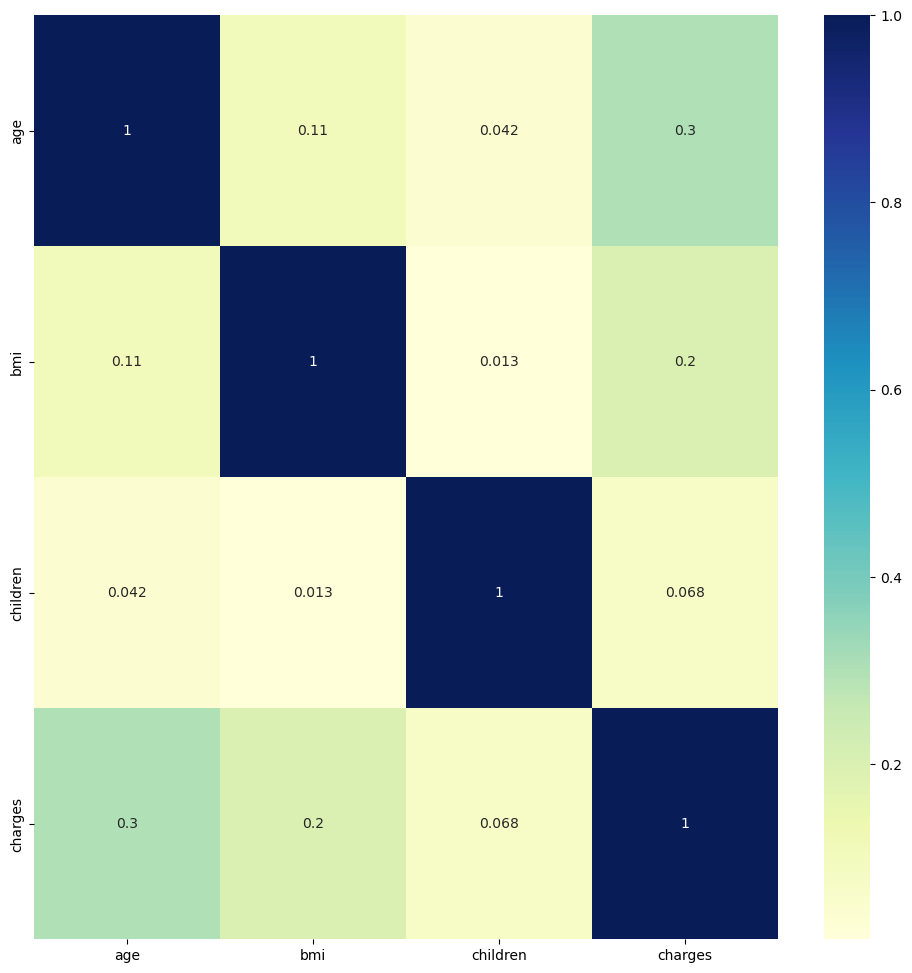

In [28]:
plt.figure(figsize = (12,12))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

So we do not have any features that is highly correlated with other feature.

##### Train Test Split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(x, y, train_size=0.70)
print("Shape of X train:",X_train.shape)
print("Shape of Y train:",y_train.shape)
print("Shape of X test:",X_test.shape)
print("Shape of Y test:",y_test.shape)

Shape of X train: (936, 5)
Shape of Y train: (936,)
Shape of X test: (402, 5)
Shape of Y test: (402,)


##### Data Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(X_train)
x_train_scaled=scale.transform(X_train)
x_test_scaled=scale.transform(X_test)


x_train=pd.DataFrame(data=x_train_scaled, columns=x.columns)
x_test=pd.DataFrame(data=x_test_scaled, columns=x.columns)

### Model Training and Evaluations of models

In [31]:
def model_evaluate(y_test,y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('MAE is {}'.format(round(mae, 3)))
    print('MSE is {}'.format(round(mse, 3)))
    print('R2 score is {}'.format(round(r2, 3)))

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

##### Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr=lr.predict(x_test)
print("Scores of Linear Regression:")
model_evaluate(y_test,y_pred_lr)

print("Train Accuracy:",lr.score(x_train, y_train))
print("Test Accuracy:",lr.score(x_test, y_test))

Scores of Linear Regression:
MAE is 0.289
MSE is 0.207
R2 score is 0.76
Train Accuracy: 0.7671344578240261
Test Accuracy: 0.7604491293675121


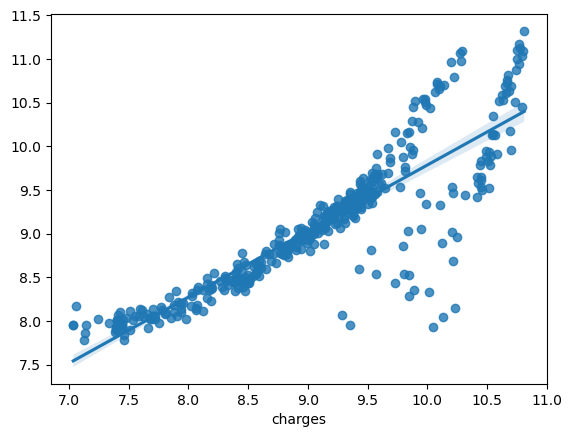

In [34]:
pickle.dump(lr, open('linear_regressor.pkl', 'wb'))
sns.regplot(x=y_test,y=y_pred_lr)
plt.show()

##### Decision Tree Regressor

In [35]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
parameter={"max_depth" : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
          "criterion":["squared_error", "friedman_mse", "absolute_error"],
          "splitter":["best", "random"]}
kf=KFold(n_splits=10)
grid_sv = GridSearchCV(dt, cv=kf, param_grid=parameter, scoring='neg_mean_absolute_error')
grid_sv.fit(x_train, y_train)
param_dict_dt=dict(grid_sv.best_params_)

DT=DecisionTreeRegressor(criterion=param_dict_dt["criterion"], 
                         max_depth=param_dict_dt["max_depth"], 
                         splitter= param_dict_dt["splitter"])
DT.fit(x_train, y_train)
y_pred_DT=DT.predict(x_test)
print("Scores of DT Regression:")
model_evaluate(y_test,y_pred_DT)
print("Train Accuracy:",DT.score(x_train, y_train))
print("Test Accuracy:",DT.score(x_test, y_test))

Scores of DT Regression:
MAE is 0.179
MSE is 0.18
R2 score is 0.792
Train Accuracy: 0.8509192619147018
Test Accuracy: 0.7915038020621208


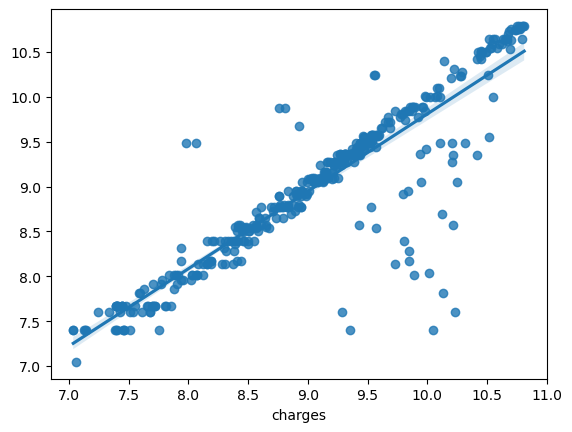

In [36]:
pickle.dump(DT, open('decision_tree_regressor.pkl', 'wb'))
sns.regplot(x=y_test,y=y_pred_DT)
plt.show()

##### Random Forest Regressor

In [37]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
parameter={"max_depth" : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
          "criterion":["squared_error", "absolute_error", "poisson"],
          "max_features":["auto", "sqrt", "log2"],
          "n_jobs":[10]}
kf=KFold(n_splits=10)
grid_rf = GridSearchCV(rf, cv=kf, param_grid=parameter, scoring='neg_mean_absolute_error')
grid_rf.fit(x_train, y_train)
param_dict_rf=dict(grid_rf.best_params_)


RF=RandomForestRegressor(criterion=param_dict_rf["criterion"], 
                         max_depth=param_dict_rf["max_depth"], 
                         max_features= param_dict_rf["max_features"])

RF.fit(x_train, y_train)
y_pred_RF=RF.predict(x_test)
print("Scores of RF Regression:")
model_evaluate(y_test,y_pred_RF)

print("Train Accuracy:",RF.score(x_train, y_train))
print("Test Accuracy:",RF.score(x_test, y_test))

Scores of RF Regression:
MAE is 0.172
MSE is 0.159
R2 score is 0.816
Train Accuracy: 0.8627996925510905
Test Accuracy: 0.8160866072459142


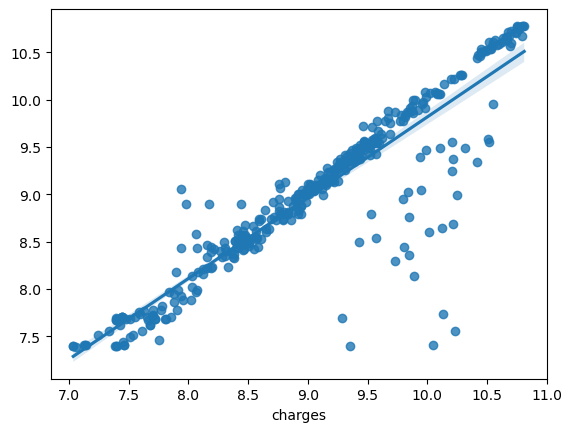

In [38]:
pickle.dump(RF, open('random_forest_regressor.pkl', 'wb'))
sns.regplot(x=y_test,y=y_pred_RF)
plt.show()

##### KNN Regressor

In [39]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
parameter={"n_neighbors" : [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
          "weights":['uniform', 'distance'],
          "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
          "n_jobs":[10]}
kf=KFold(n_splits=10)
grid_knn = GridSearchCV(knn, cv=kf, param_grid=parameter, scoring='neg_mean_absolute_error')
grid_knn.fit(x_train, y_train)
param_dict_knn=dict(grid_knn.best_params_)

KNN=KNeighborsRegressor(n_neighbors=param_dict_knn["n_neighbors"], 
                        weights=param_dict_knn["weights"], 
                        algorithm= param_dict_knn["algorithm"])
KNN.fit(x_train, y_train)
y_pred_KNN=KNN.predict(x_test)
print("Scores of KNN Regression:")
model_evaluate(y_test,y_pred_KNN)

print("Train Accuracy:",KNN.score(x_train, y_train))
print("Test Accuracy:",KNN.score(x_test, y_test))

Scores of KNN Regression:
MAE is 0.234
MSE is 0.188
R2 score is 0.783
Train Accuracy: 0.9970152211664614
Test Accuracy: 0.7825045026279047


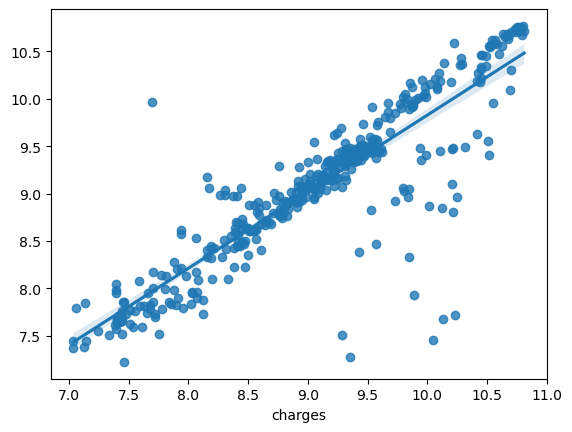

In [40]:
pickle.dump(KNN, open('knn_regressor.pkl', 'wb'))
sns.regplot(x=y_test,y=y_pred_KNN)
plt.show()

##### Gradient Boost Regressor

In [41]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
parameter={"loss" : ['squared_error', 'absolute_error'],
          "criterion":['squared_error', 'mse', 'mae'],
          "max_depth":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
           "max_features":['auto', 'sqrt', 'log2']}

kf=KFold(n_splits=10)
grid_gb = GridSearchCV(gb, cv=kf, param_grid=parameter, scoring='neg_mean_absolute_error')
grid_gb.fit(x_train, y_train)
param_dict_gb=dict(grid_gb.best_params_)

GB=GradientBoostingRegressor(loss=param_dict_gb["loss"], 
                             criterion=param_dict_gb["criterion"], 
                             max_depth= param_dict_gb["max_depth"],
                             max_features=param_dict_gb["max_features"])
GB.fit(x_train, y_train)
y_pred_GB=GB.predict(x_test)
print("Scores of GB Regression:")
model_evaluate(y_test,y_pred_GB)

print("Train Accuracy:",GB.score(x_train, y_train))
print("Test Accuracy:",GB.score(x_test, y_test))

Scores of GB Regression:
MAE is 0.155
MSE is 0.152
R2 score is 0.824
Train Accuracy: 0.8391788487684381
Test Accuracy: 0.8240136063549081


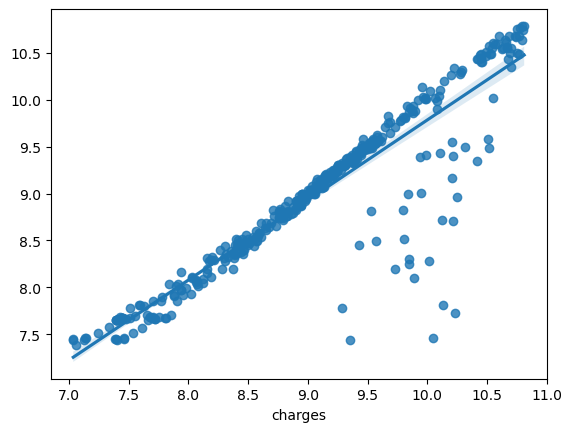

In [42]:
pickle.dump(GB, open('gradient_boost_regressor.pkl', 'wb'))
sns.regplot(x=y_test,y=y_pred_GB)
plt.show()

##### Creating dataframe with MAE, MSE and R2-Score of all trained models to better visualization

In [43]:
regressors = {
    'Linear Regression' : lr,
    'Decision Tree' : DT,
    'Random Forest' : RF,
    'K-nearest Neighbors' : KNN,
    'Gradient Boost' : GB
}
results=pd.DataFrame(columns=['Train Score', 'Test Score', 'MAE', 'MSE', 'R2-score'])
for method,func in regressors.items():
    pred = func.predict(x_test)
    results.loc[method]= [
                          func.score(x_train, y_train),
                          func.score(x_test, y_test),
                          np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.round(r2_score(y_test,pred),3)
                         ]
    
final_result=results.sort_values('R2-score',ascending=False).style.background_gradient(cmap='Greens',subset=['R2-score'])    
display(final_result)    

,Train Score,Test Score,MAE,MSE,R2-score
Gradient Boost,0.839179,0.824014,0.155000,0.152000,0.824000
Random Forest,0.862800,0.816087,0.172000,0.159000,0.816000
Decision Tree,0.850919,0.791504,0.179000,0.180000,0.792000
K-nearest Neighbors,0.997015,0.782505,0.234000,0.188000,0.783000
Linear Regression,0.767134,0.760449,0.289000,0.207000,0.760000


In [6]:
sns.distplot(d, hist=False, kde=True) 

KeyError: 'charges'